<a href="https://colab.research.google.com/github/danielpokerabc/Projeto_Imersao_IA_Alura/blob/main/Reconhecendo_animais_peconhentos_Gemini_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q -U google-generativeai

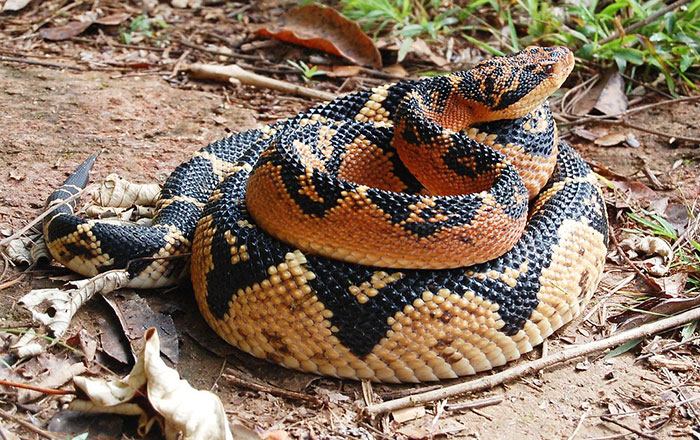

>  1. Nome científico: _Lachesis muta_
> Nome popular: Surucucu.
> 
> 2. Sim, o animal é venenoso.
> 
> 3. A surucucu é uma serpente peçonhenta da família Viperidae, encontrada na América do Sul. É uma das maiores cobras venenosas do mundo, com comprimento médio de 2 a 3 metros, podendo atingir até 4 metros. A surucucu é encontrada em florestas tropicais e subtropicais, desde a Venezuela até o Paraguai. Alimenta-se principalmente de roedores, mas também pode comer anfíbios, aves e outros répteis. A surucucu é uma cobra venenosa, mas não é agressiva. Ela só ataca quando se sente ameaçada. O veneno da surucucu é uma potente neurotoxina, que pode causar dor intensa, paralisia e morte. O tratamento para o envenenamento por surucucu é feito com soro antiofídico.

In [49]:
import google.generativeai as genai
from PIL import Image
import io
import os
import base64

import google.generativeai as genai
from google.colab import userdata
# Melhorando a visualização
# Código disponível em https://ai.google.dev/tutorials/python_quickstart#import_packages
import textwrap
from IPython.display import display
from IPython.display import Markdown
import PIL.Image

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') #Localização do codigo da API https://aistudio.google.com/
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.

genai.configure(api_key=GOOGLE_API_KEY)


generation_config=genai.types.GenerationConfig( temperature=0.5)

safety_settings = {
    "HARASSMENT": "BLOCK_NONE", #PARA DEIXAR O BLOQUEO VAZIO
    "HATE": "BLOCK_NONE", #PARA DEIXAR O BLOQUEO VAZIO
    "SEXUAL": "BLOCK_NONE", #PARA DEIXAR O BLOQUEO VAZIO
    "DANGEROUS": "BLOCK_NONE"
}
#gemini-1.0-pro
#gemini-pro-vision
#gemini-1.0-pro-vision-latest
model = genai.GenerativeModel(model_name='gemini-1.0-pro-vision-latest',
                              generation_config=generation_config,
                              safety_settings=safety_settings)



def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def identificar_animal_venenoso(imagem_path):
  global model

  try:
    # Carrega a imagem
    img = PIL.Image.open(imagem_path)

    # Prepara o prompt com a imagem codificada
    prompt = f"""Analise a imagem e identifique a espécie do animal com o máximo de precisão possível e
    verifique se imagem mostra um animal que pode ser venenoso? E responda as seguintes informações em topicos:
    1. Nome cientifico e popular do animal (se houver um animal claramente visível)
    2. Se o animal é venenoso.
    3. Informações relevantes sobre o veneno do animal, (por exemplo, tipo de veneno, sintomas, etc.).
    """
    # Faz a requisição para a API
    response = model.generate_content([prompt, img])
    display(img)
    # Processa a resposta da API
    display(to_markdown(response.text))

  except Exception as e:
    print(f"Ocorreu um erro: {e}")
    return None


# Caminho para a imagem
imagem_path = "/content/Serpente.jpg"

# Chama a função e armazena o resultado
identificar_animal_venenoso(imagem_path)
